In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
import tensorflow
from tensorflow.compat.v1.keras.backend import set_session

config = tensorflow.compat.v1.ConfigProto()

config.gpu_options.allow_growth = True  # dynamically grow the memory used on the GPU

config.log_device_placement = True  # to log device placement (on which device the operation ran)

sess = tensorflow.compat.v1.Session(config=config)

set_session(sess)

Device mapping:
/job:localhost/replica:0/task:0/device:GPU:0 -> device: 0, name: GeForce RTX 2060, pci bus id: 0000:01:00.0, compute capability: 7.5



In [3]:
#Loading Data
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
print("Number of samples in the training dataset are {}".format(len(x_train)))
print("Shape of training samples are " + str(x_train[0].shape))
print("Number of testing dataset are " + str(len(x_test)))
print("Shape of testing dataset are " + str(x_test[0].shape))
print("Shape of training labels are " + str(y_train.shape))
print("Shape of testing labels are " + str(y_test.shape))

Number of samples in the training dataset are 60000
Shape of training samples are (28, 28)
Number of testing dataset are 10000
Shape of testing dataset are (28, 28)
Shape of training labels are (60000,)
Shape of testing labels are (10000,)


In [ ]:
#Looking at some random images of the dataset

for i in range(0,10):
    num = np.random.randint(0, len(x_train))
    img = x_train[num]
    window_name = "Random Sample #" + str(i)
    cv2.imshow(window_name, img)
    cv2.waitKey(0)
    
cv2.destroyAllWindows()

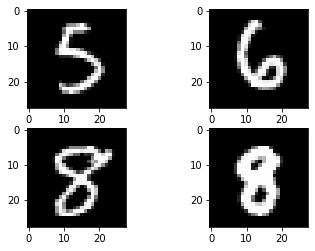

In [6]:
plt.subplot(221)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(222)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

plt.subplot(223)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap=plt.get_cmap('gray'))

plt.subplot(224)
random_num = np.random.randint(0, len(x_train))
plt.imshow(x_train[random_num], cmap = plt.get_cmap('gray'))

In [7]:
img_rows = x_train[0].shape[0] #Storing number of rows
img_cols = x_train[1].shape[0]

In [8]:
#Adding the channel dimension to the dataset shape
#Keras input in Number of Samples, Rows, Cols, Depth
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

In [9]:
print("Number of Training samples are {} \nNumber of testing samples are {}"
     .format(x_train.shape[0], x_test.shape[0]))
x_train.shape, x_test.shape

Number of Training samples are 60000 
Number of testing samples are 10000


((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
input_shape = img_rows, img_cols, 1
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalizing data from (0,255) to between (0,1)
x_train = x_train/255
x_test = x_test/255


In [11]:
#One hot encoding
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [12]:
#Number of feature and columns converted to categorical values are
print("Number of classes are ",y_test.shape[1])
print("Pixels of each image is {} * {} px ".format(x_train.shape[1],
                                                   x_train.shape[2]))

Number of classes are  10
Pixels of each image is 28 * 28 px 


In [13]:
num_classes = y_train.shape[1]

In [14]:
import tensorflow as tf

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape = input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [16]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras import backend as K
model.compile(loss='categorical_crossentropy',
             optimizer = SGD(0.01),
             metrics = ['accuracy'])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [20]:
%load_ext tensorboard
!rm -rf ./logs/ 
%reload_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


'rm' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
#Training model
batch_size = 32
epochs = 10

import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


history = model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_test, y_test))

score = model.evaluate(x_test, y_test, verbose = 0)
print("Test loss ", score[0])
print("Training Accuracy ", score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 112us/sample - loss: 0.2963 - accuracy: 0.9106 - val_loss: 0.1391 - val_accuracy: 0.9582
Epoch 2/10
60000/60000 [==============================] - 7s 111us/sample - loss: 0.2276 - accuracy: 0.9319 - val_loss: 0.1085 - val_accuracy: 0.9672
Epoch 3/10
60000/60000 [==============================] - 7s 110us/sample - loss: 0.1841 - accuracy: 0.9448 - val_loss: 0.0872 - val_accuracy: 0.9720
Epoch 4/10
60000/60000 [==============================] - 7s 115us/sample - loss: 0.1487 - accuracy: 0.9557 - val_loss: 0.0702 - val_accuracy: 0.9773
Epoch 5/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1268 - accuracy: 0.9629 - val_loss: 0.0599 - val_accuracy: 0.9818
Epoch 6/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.1107 - accuracy: 0.9670 - val_loss: 0.0527 - val_accuracy: 0.9827
Epoch 7/10
60000/60000 [==========================

In [26]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

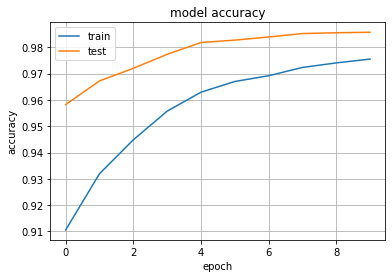

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

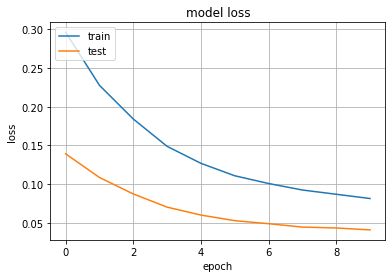

In [30]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid(True)
plt.show()

In [37]:
tensor_board = tf.keras.callbacks.TensorBoard('./logs/fit', profile_batch = 0)

model.fit(x_train, y_train,
          batch_size = batch_size,
          epochs = epochs,
          verbose = 1,
          validation_data = (x_test, y_test),
         callbacks=[tensor_board])


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 140us/sample - loss: 0.0473 - accuracy: 0.9845 - val_loss: 0.0324 - val_accuracy: 0.9905
Epoch 2/10
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0466 - accuracy: 0.9851 - val_loss: 0.0300 - val_accuracy: 0.9909
Epoch 3/10
60000/60000 [==============================] - 9s 143us/sample - loss: 0.0454 - accuracy: 0.9857 - val_loss: 0.0328 - val_accuracy: 0.9896
Epoch 4/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0442 - accuracy: 0.9864 - val_loss: 0.0297 - val_accuracy: 0.9901
Epoch 5/10
60000/60000 [==============================] - 8s 135us/sample - loss: 0.0423 - accuracy: 0.9864 - val_loss: 0.0303 - val_accuracy: 0.9904
Epoch 6/10
60000/60000 [==============================] - 8s 136us/sample - loss: 0.0409 - accuracy: 0.9866 - val_loss: 0.0297 - val_accuracy: 0.9905
Epoch 7/10
60000/60000 [==========================